In [1]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [43]:
def init_erdos_renyi_graph(N,Lambda):
        
    G = nx.Graph()
    G.add_nodes_from(range(1,N+1))
    pN = Lambda/N
    
    pairs = list(itertools.combinations(range(1,N+1), 2))
    
    for pair in pairs:
        U = np.random.rand()
        
        if U <= pN:
            G.add_edge(*pair)
    
    return(G)

In [54]:
G=init_erdos_renyi_graph(10,2.5)

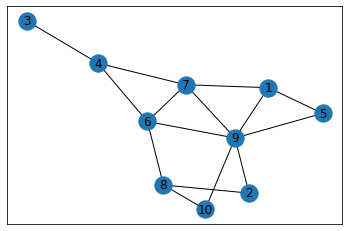

In [55]:
nx.draw_networkx(G)

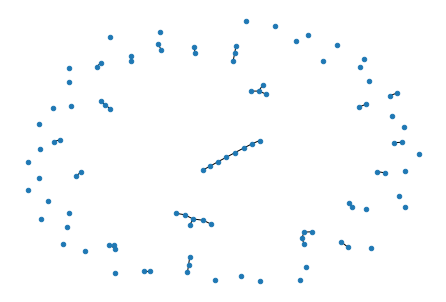

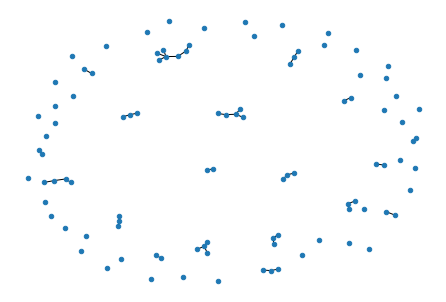

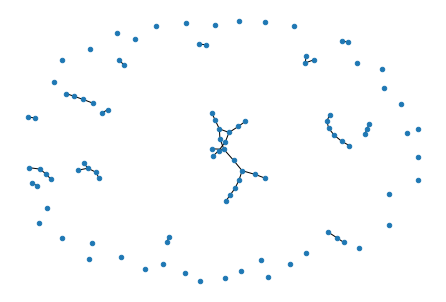

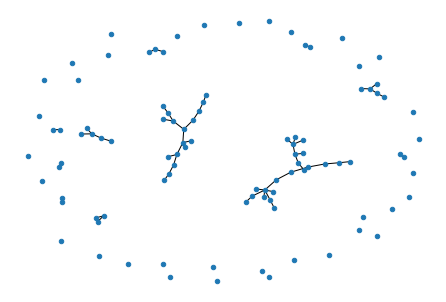

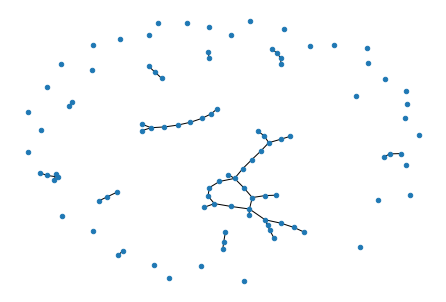

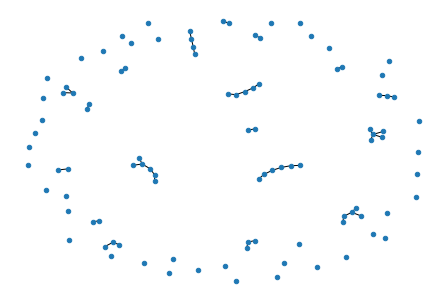

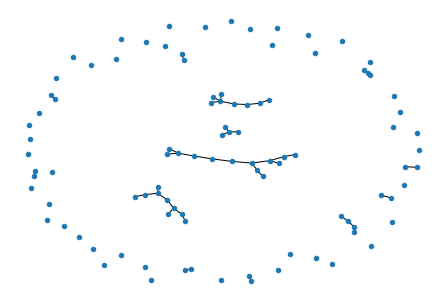

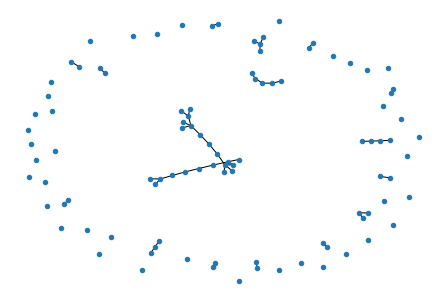

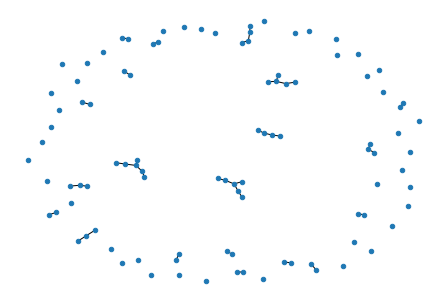

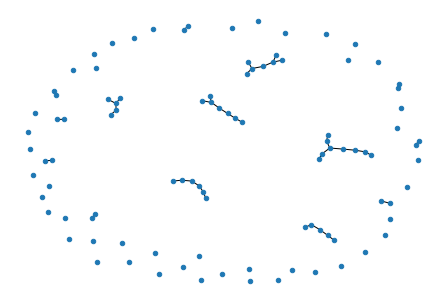

In [88]:
for i in range(10):
    G=init_erdos_renyi_graph(100,0.9)
    nx.draw(G,with_labels=False,node_size=20)
    plt.show()

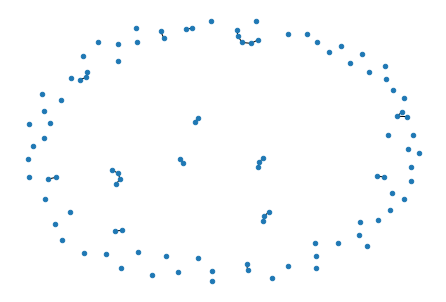

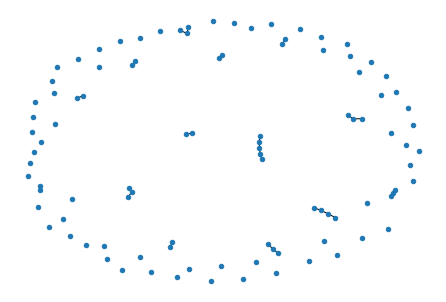

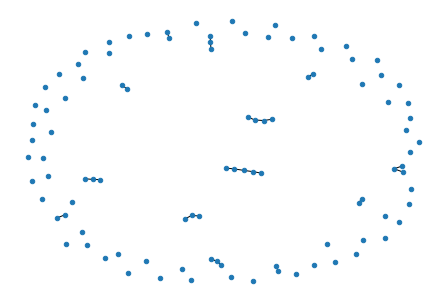

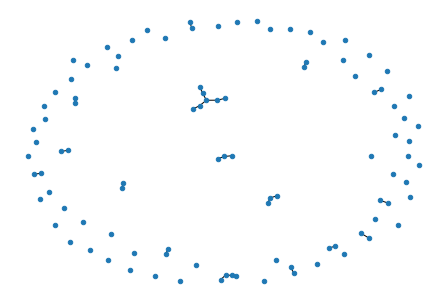

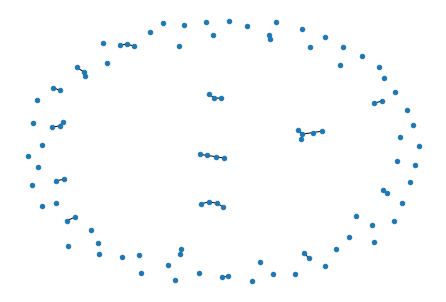

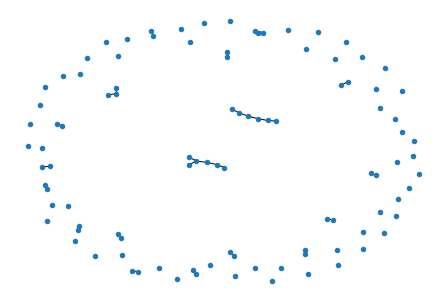

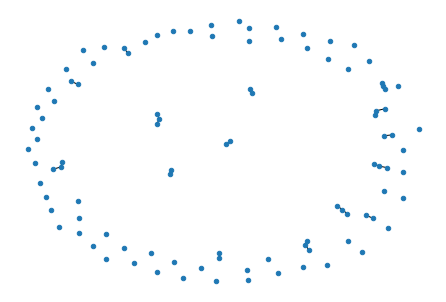

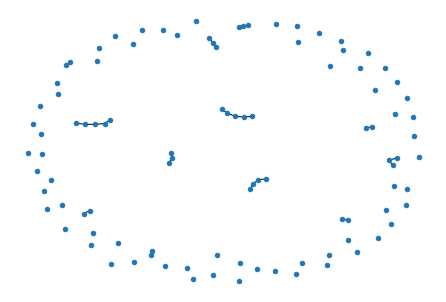

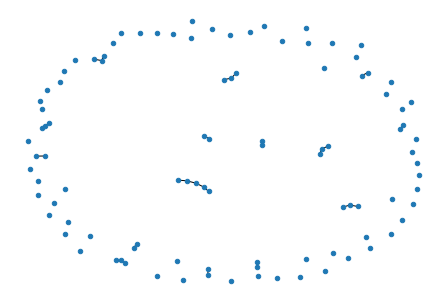

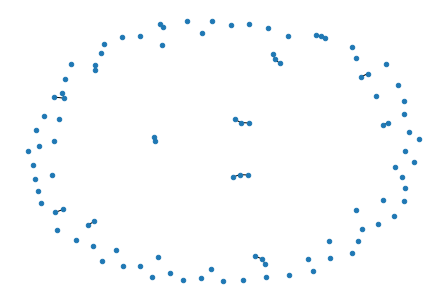

In [90]:
for i in range(10):
    G=init_erdos_renyi_graph(100,0.5)
    nx.draw(G,with_labels=False,node_size=20)
    plt.show()

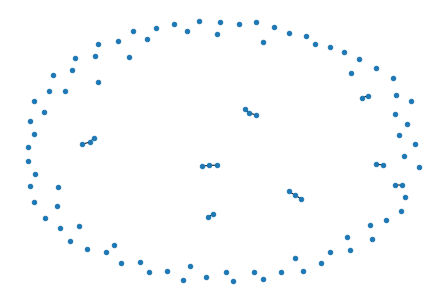

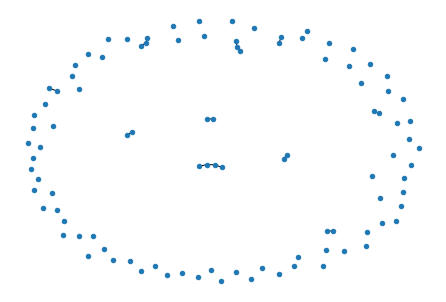

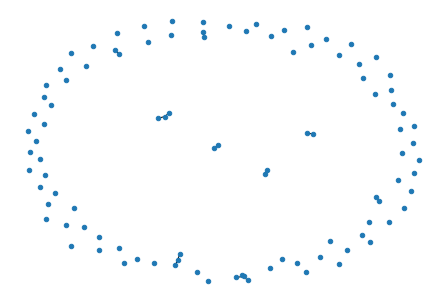

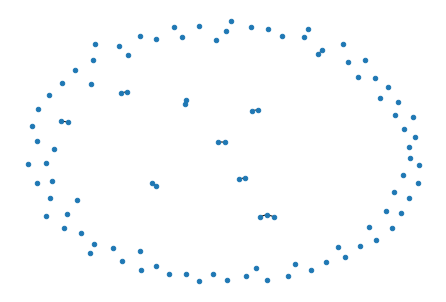

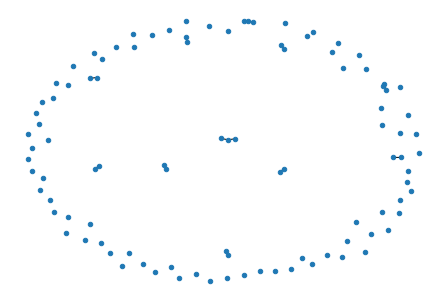

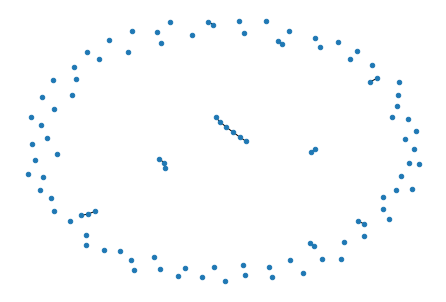

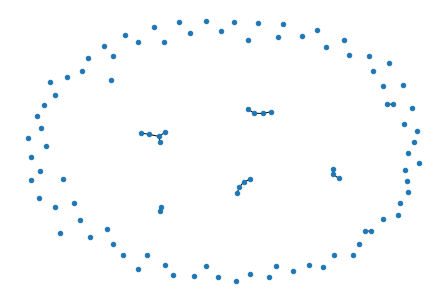

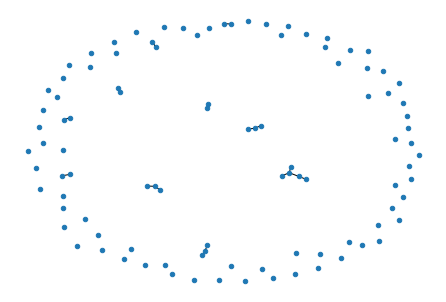

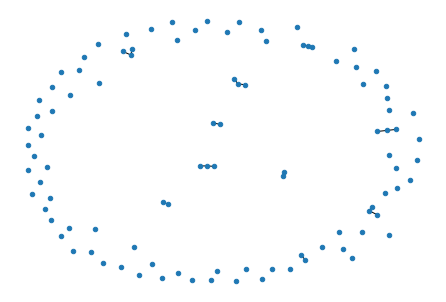

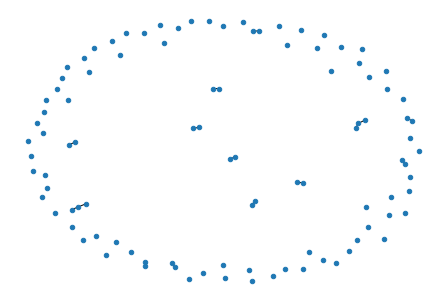

In [91]:
for i in range(10):
    G=init_erdos_renyi_graph(100,0.3)
    nx.draw(G,with_labels=False,node_size=20)
    plt.show()

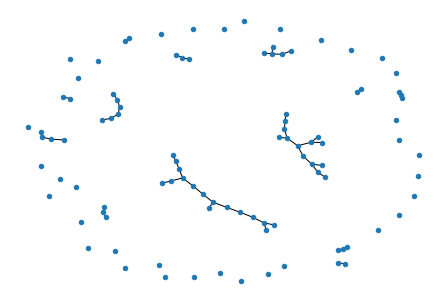

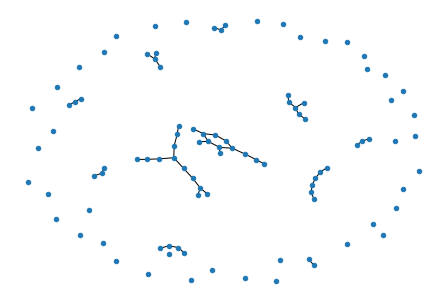

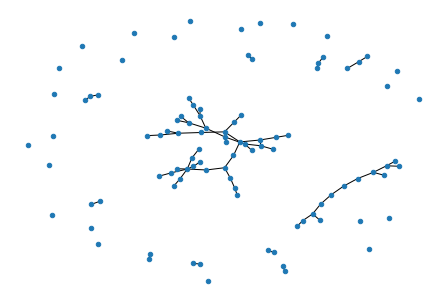

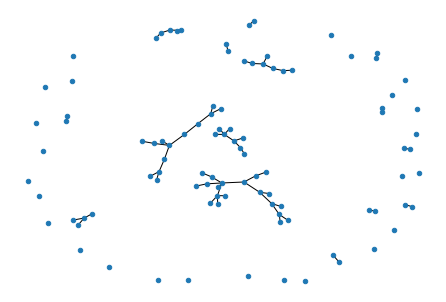

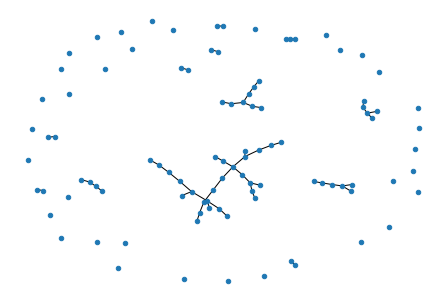

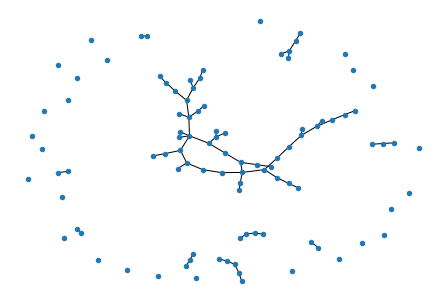

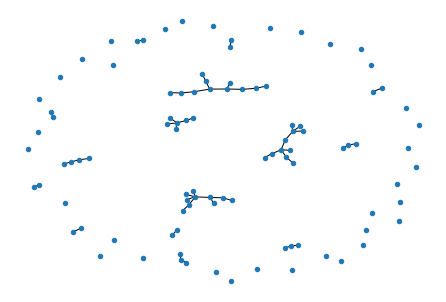

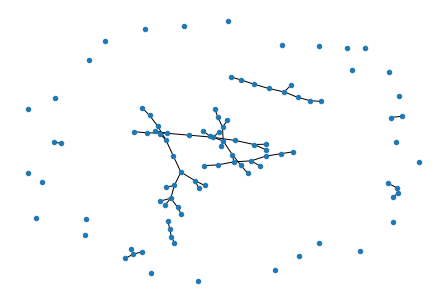

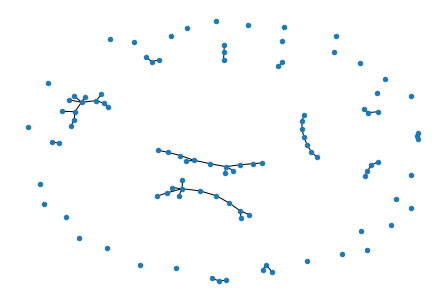

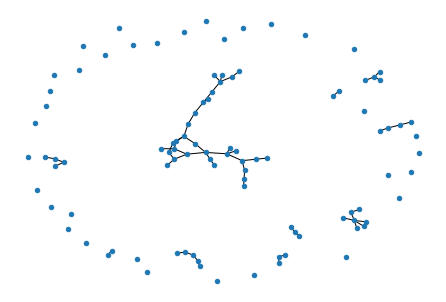

In [92]:
for i in range(10):
    G=init_erdos_renyi_graph(100,1.1)
    nx.draw(G,with_labels=False,node_size=20)
    plt.show()

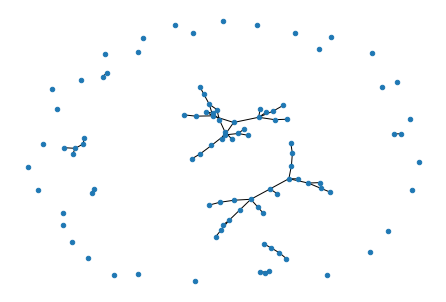

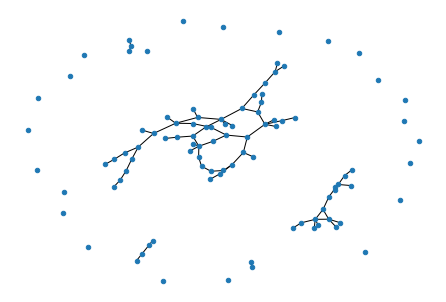

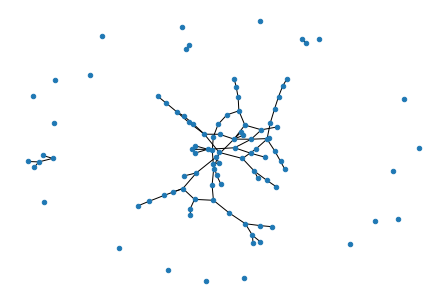

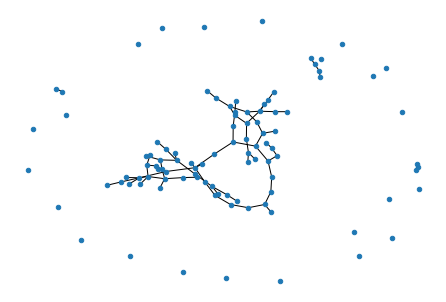

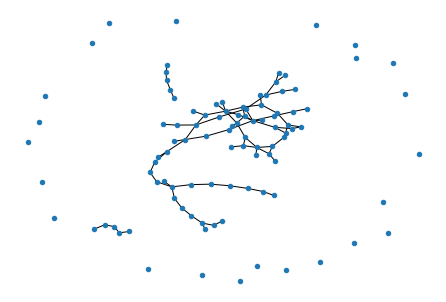

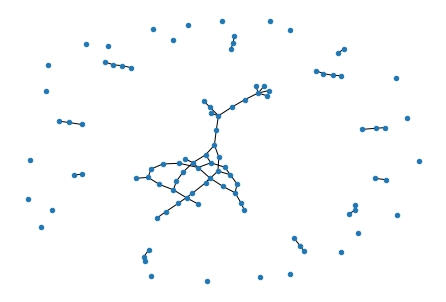

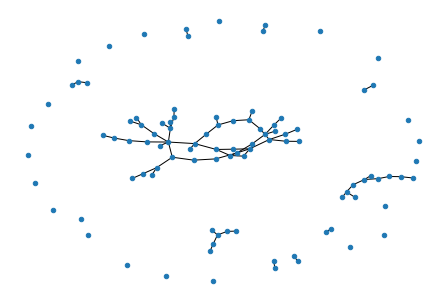

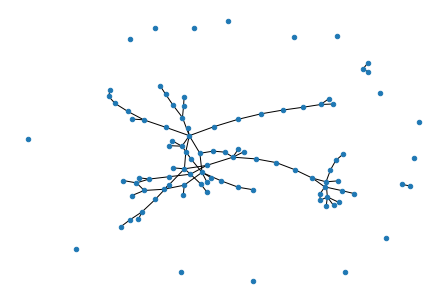

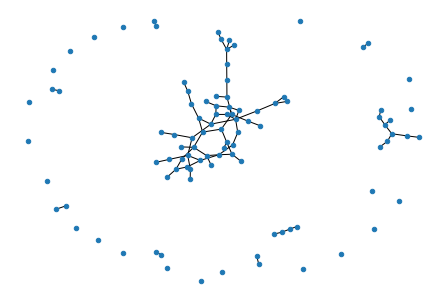

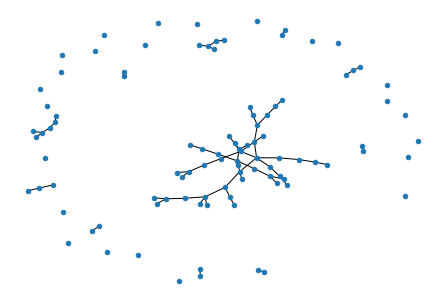

In [93]:
for i in range(10):
    G=init_erdos_renyi_graph(100,1.5)
    nx.draw(G,with_labels=False,node_size=20)
    plt.show()

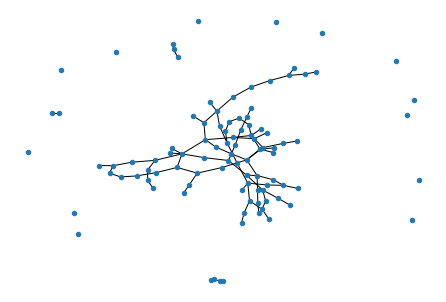

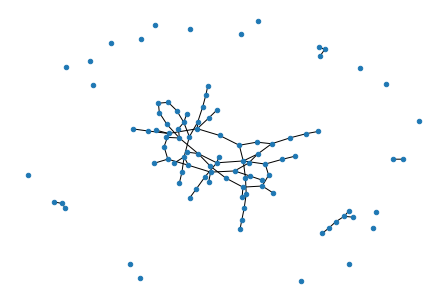

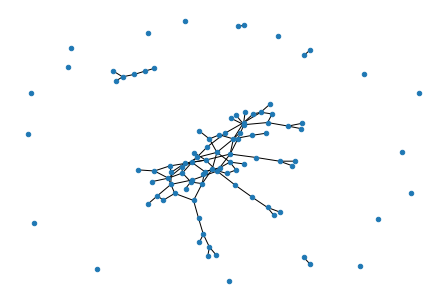

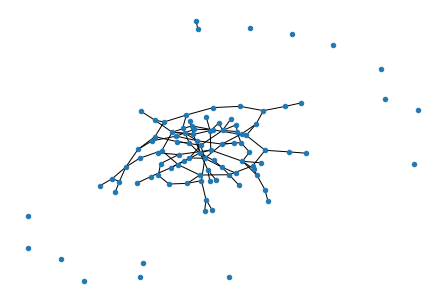

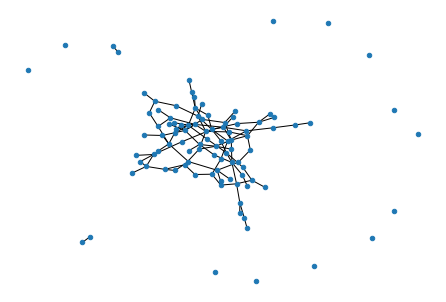

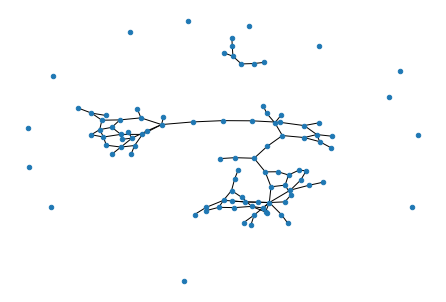

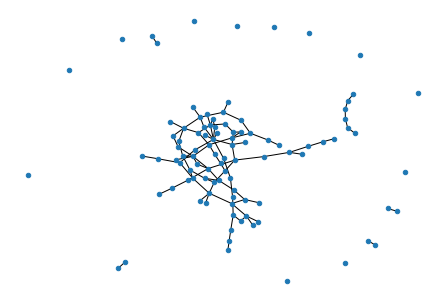

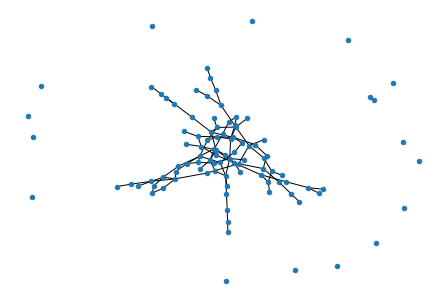

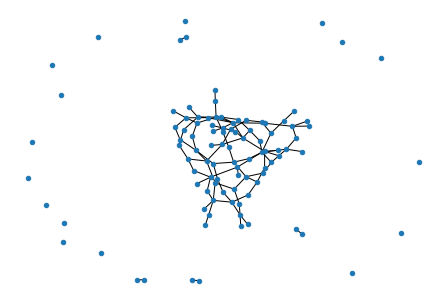

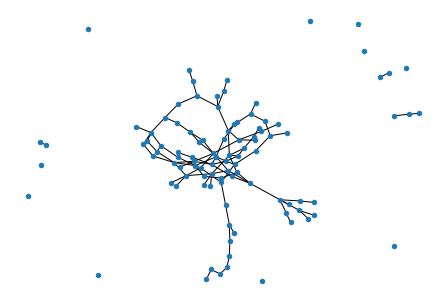

In [94]:
for i in range(10):
    G=init_erdos_renyi_graph(100,2)
    nx.draw(G,with_labels=False,node_size=20)
    plt.show()

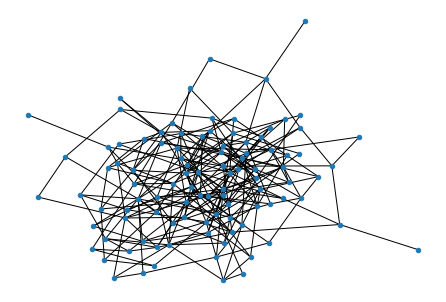

In [140]:
G=init_erdos_renyi_graph(100,5)
nx.draw(G,with_labels=False,node_size=20)
plt.show()

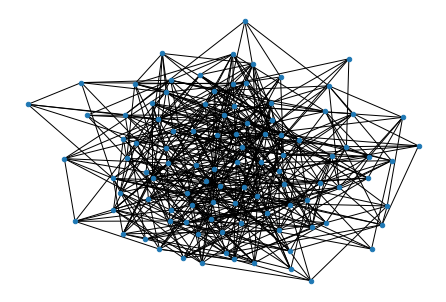

In [97]:
G=init_erdos_renyi_graph(100,10)
nx.draw(G,with_labels=False,node_size=20)
plt.show()

In [ ]:
def init_erdos_renyi_graph(N,Lambda):
        
    G = nx.Graph()
    G.add_nodes_from(range(1,N+1))
    pN = Lambda/N
    
    pairs = list(itertools.combinations(range(1,N+1), 2))
    
    for pair in pairs:
        U = np.random.rand()
        
        if U <= pN:
            G.add_edge(*pair)
    
    return(G)

In [143]:
def initialize_network(O,N,Lambda):
    
    X = random.choices(O,k=N)
    
    G = nx.Graph()
    G.add_nodes_from(range(1,N+1))
    pN = Lambda/N
    
    pairs = list(itertools.combinations(range(1,N+1), 2))
    
    for pair in pairs:
        U = np.random.rand()
        
        if U <= pN:
            G.add_edge(*pair)
    
    df = pd.DataFrame()
    df['node'] = range(1,N+1)
    df['opinion']=X
    
    node_attr = df.set_index('node').to_dict('index')
    nx.set_node_attributes(G, node_attr)
    
    return(G)

In [158]:
def color(a):
    if a == 1:
        return('yellow')
    else:
        return('orange')
    
def show_network(G):
    
    opinions = nx.get_node_attributes(G,'opinion').values()

    nx.draw(G, with_labels=False, node_size=30, node_color=list(map(color,opinions)))
    plt.show()

In [163]:
G=initialize_network([1,0],100,2)

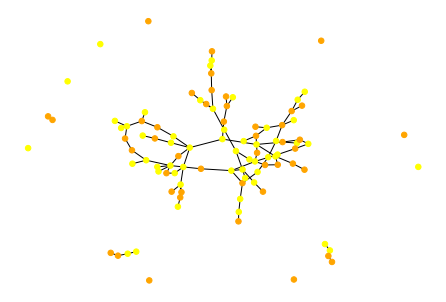

In [164]:
show_network(G)

In [169]:
def update_graph(G):
    
    N = len(G.nodes)
    
    An = random.randint(1,N)
    influencers = list(G.neighbors(An))
    
    #####
    if len(influencers) > 0:
        opinions = nx.get_node_attributes(G,'opinion')
        influencers_opinions = [opinions[x] for x in influencers]

        prob_positive = sum(influencers_opinions)/len(influencers)
        new_op = np.random.choice(2, 1, p=[1-prob_positive,prob_positive])[0]
        G.nodes[An]['opinion'] = new_op
    else:
        pass
    
    return(G)

In [174]:
def update_graph_T_times(G,T,show=False):
    
    for i in range(T):
        G = update_graph(G)
     
    if show==True:
            show_network(G)
            
    return(G)

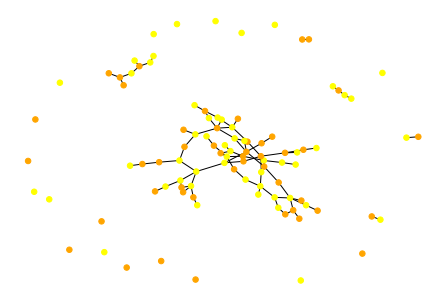

The initial share of actors with opinion +1 is 53.0%.


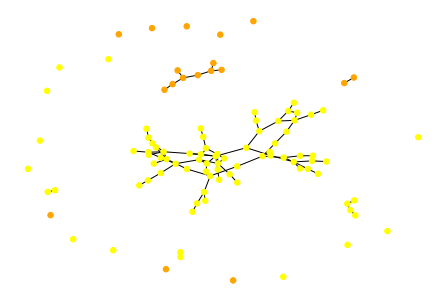

The final share of actors with opinion +1 is 82.0%.


In [182]:
O = [0,1] # lista de opinioes
N=100
Lambda=2
T=10000
G=initialize_network(O,N,Lambda)
show_network(G)

opinion_positive = sum(nx.get_node_attributes(G,'opinion').values())
G = update_graph_T_times(G,T)
print('The initial share of actors with opinion +1 is {}%.'.format(100*opinion_positive/len(G.nodes)))
show_network(G);
opinion_positive = sum(nx.get_node_attributes(G,'opinion').values())
print('The final share of actors with opinion +1 is {}%.'.format(100*opinion_positive/len(G.nodes)))

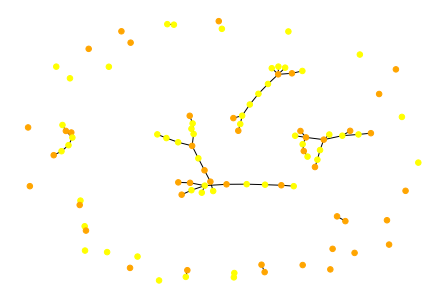

The initial share of actors with opinion +1 is 54.0%.


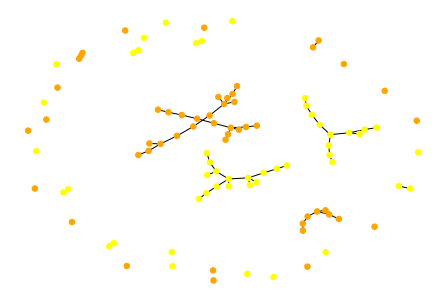

The final share of actors with opinion +1 is 49.0%.


In [179]:
O = [0,1] # lista de opinioes
N=100
Lambda=0.9
T=3000
G=initialize_network(O,N,Lambda)
show_network(G)

opinion_positive = sum(nx.get_node_attributes(G,'opinion').values())
G = update_graph_T_times(G,T)
print('The initial share of actors with opinion +1 is {}%.'.format(100*opinion_positive/len(G.nodes)))
show_network(G);
opinion_positive = sum(nx.get_node_attributes(G,'opinion').values())
print('The final share of actors with opinion +1 is {}%.'.format(100*opinion_positive/len(G.nodes)))